In [1]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\renan\\Desktop\\inequality\\inequality')

from dissimilarity import Dissim
from spatial_dissimilarity import Spatial_Dissim
from entropy import Entropy
from perimeter_area_ratio_spatial_dissimilarity import Perimeter_Area_Ratio_Spatial_Dissim
from absolute_centralization import Absolute_Centralization
from absolute_concentration import Absolute_Concentration
from atkinson import Atkinson
from bias_corrected_dissimilarity import Bias_Corrected_Dissim
from boundary_spatial_dissimilarity import Boundary_Spatial_Dissim
from conprof import Con_Prof
from correlationr import Correlation_R
from delta import Delta
from density_corrected_dissimilarity import Density_Corrected_Dissim
from exposure import Exposure
from gini_seg import Gini_Seg
from isolation import Isolation
from modified_dissimilarity import Modified_Dissim
from modified_gini_seg import Modified_Gini_Seg
from relative_centralization import Relative_Centralization
from relative_clustering import Relative_Clustering
from relative_concentration import Relative_Concentration
from spatial_exposure import Spatial_Exposure
from spatial_isolation import Spatial_Isolation
from spatial_prox_profile import Spatial_Prox_Prof
from infer_segregation import Infer_Segregation
from compare_segregation import Compare_Segregation
from spatial_proximity import Spatial_Proximity

In [2]:
os.chdir('C:/Users/renan/Desktop/full_count_2010')
census_2010 = pd.read_csv('std_2010_fullcount.csv', encoding = "ISO-8859-1", sep = ",")

In [3]:
df = census_2010.loc[census_2010.county == "Riverside County"][['trtid10', 'pop10','nhblk10']]
map_url = 'https://raw.githubusercontent.com/renanxcortes/inequality-segregation-supplementary-files/master/Tracts_grouped_by_County/06065.json'
map_gpd = gpd.read_file(map_url)
map_gpd['INTGEOID10'] = pd.to_numeric(map_gpd["GEOID10"])
gdf_pre = map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
gdf = gdf_pre[['geometry', 'pop10', 'nhblk10']]

gdf['share'] = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['nhblk10'].sum())
gdf['rel']   = np.where(gdf['pop10'] == 0, 0, gdf['nhblk10'] / gdf['pop10'])


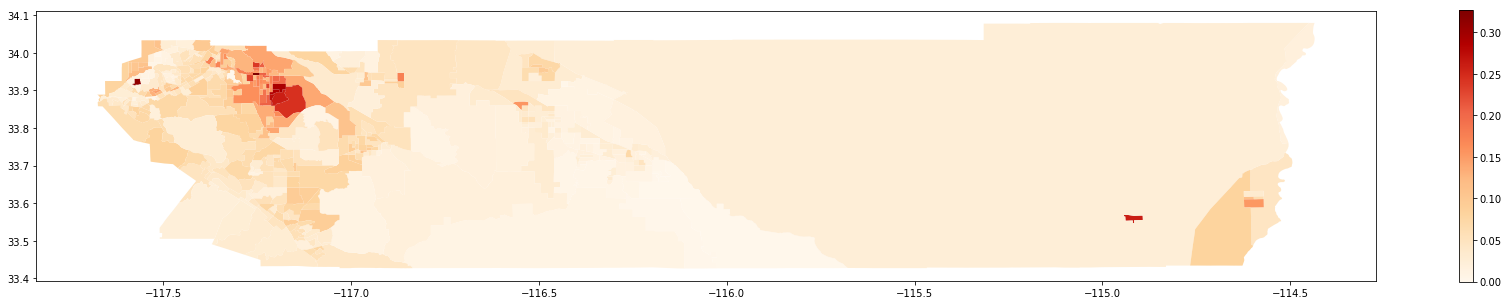

In [4]:
import matplotlib
ax1 = gdf.plot(column='rel',
               cmap = 'OrRd', 
               figsize=(30,5),
               legend = True)

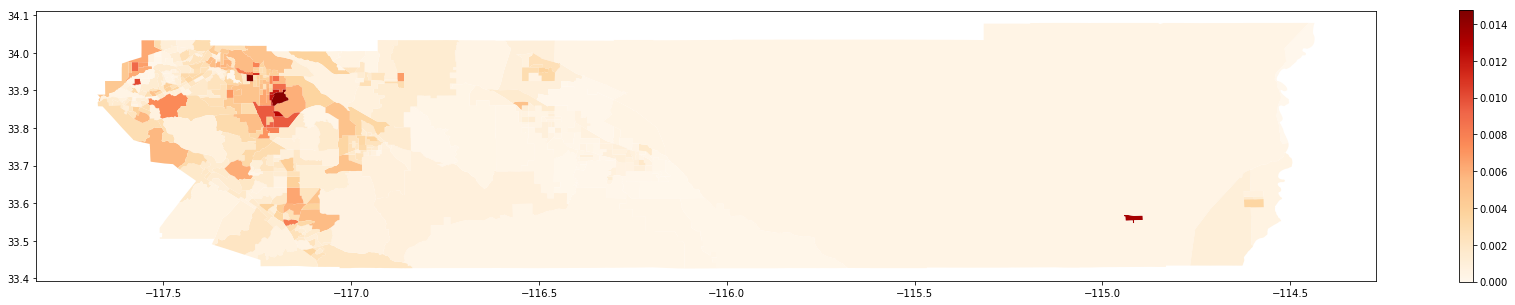

In [5]:
ax1 = gdf.plot(column='share',
               cmap = 'OrRd', 
               figsize=(30,5),
               legend = True)

In [6]:
# Non-Spatial measures
D = Dissim(df, 'nhblk10', 'pop10')
G = Gini_Seg(df, 'nhblk10', 'pop10')
H = Entropy(df, 'nhblk10', 'pop10')
A = Atkinson(df, 'nhblk10', 'pop10')
xPy = Exposure(df, 'nhblk10', 'pop10')
xPx = Isolation(df, 'nhblk10', 'pop10')
R = Con_Prof(df, 'nhblk10', 'pop10')
Dbc = Bias_Corrected_Dissim(df, 'nhblk10', 'pop10')
Ddc = Density_Corrected_Dissim(df, 'nhblk10', 'pop10')
V = Correlation_R(df, 'nhblk10', 'pop10')
Dct = Modified_Dissim(df, 'nhblk10', 'pop10')
Gct = Modified_Gini_Seg(df, 'nhblk10', 'pop10')

In [7]:
# Spatial measures
SD = Spatial_Dissim(gdf, 'nhblk10', 'pop10')
PARD = Perimeter_Area_Ratio_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
BSD = Boundary_Spatial_Dissim(gdf, 'nhblk10', 'pop10')
ACE = Absolute_Centralization(gdf, 'nhblk10', 'pop10')
ACO = Absolute_Concentration(gdf, 'nhblk10', 'pop10')
DEL = Delta(gdf, 'nhblk10', 'pop10')
RCE = Relative_Centralization(gdf, 'nhblk10', 'pop10')
RCL = Relative_Clustering(gdf, 'nhblk10', 'pop10')
RCO = Relative_Concentration(gdf, 'nhblk10', 'pop10')
SxPy = Spatial_Exposure(gdf, 'nhblk10', 'pop10')
SxPx = Spatial_Isolation(gdf, 'nhblk10', 'pop10')
SPP = Spatial_Prox_Prof(gdf, 'nhblk10', 'pop10')
SP = Spatial_Proximity(gdf, 'nhblk10', 'pop10')

### Riverside in 2010: systematic approach

In [8]:
all_measures = (D, G, H, xPx, xPy, A, V, R, Dct, Gct, Dbc, Ddc, SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

Dissim Time = 0.03319668769836426
Gini_Seg Time = 0.04686427116394043
Entropy Time = 0.04686570167541504
Isolation Time = 0.04299211502075195
Exposure Time = 0.046530961990356445
Atkinson Time = 0.03989291191101074
Correlation_R Time = 0.04487895965576172
Con_Prof Time = 0.9100024700164795
Modified_Dissim Time = 2.2998828887939453
Modified_Gini_Seg Time = 5.182591915130615
Bias_Corrected_Dissim Time = 2.3925766944885254
Density_Corrected_Dissim Time = 10.03691840171814
Spatial_Prox_Prof Time = 1.132861852645874
Spatial_Dissim Time = 0.3210265636444092
Boundary_Spatial_Dissim Time = 1.8200626373291016
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.8594069480895996
Spatial_Isolation Time = 0.09367823600769043
Spatial_Exposure Time = 0.0997617244720459
Spatial_Proximity Time = 0.08389401435852051
Relative_Clustering Time = 0.1016533374786377
Delta Time = 0.0439600944519043
Absolute_Concentration Time = 0.0624539852142334
Relative_Concentration Time = 0.06649494171142578
Absolute_Centralizat

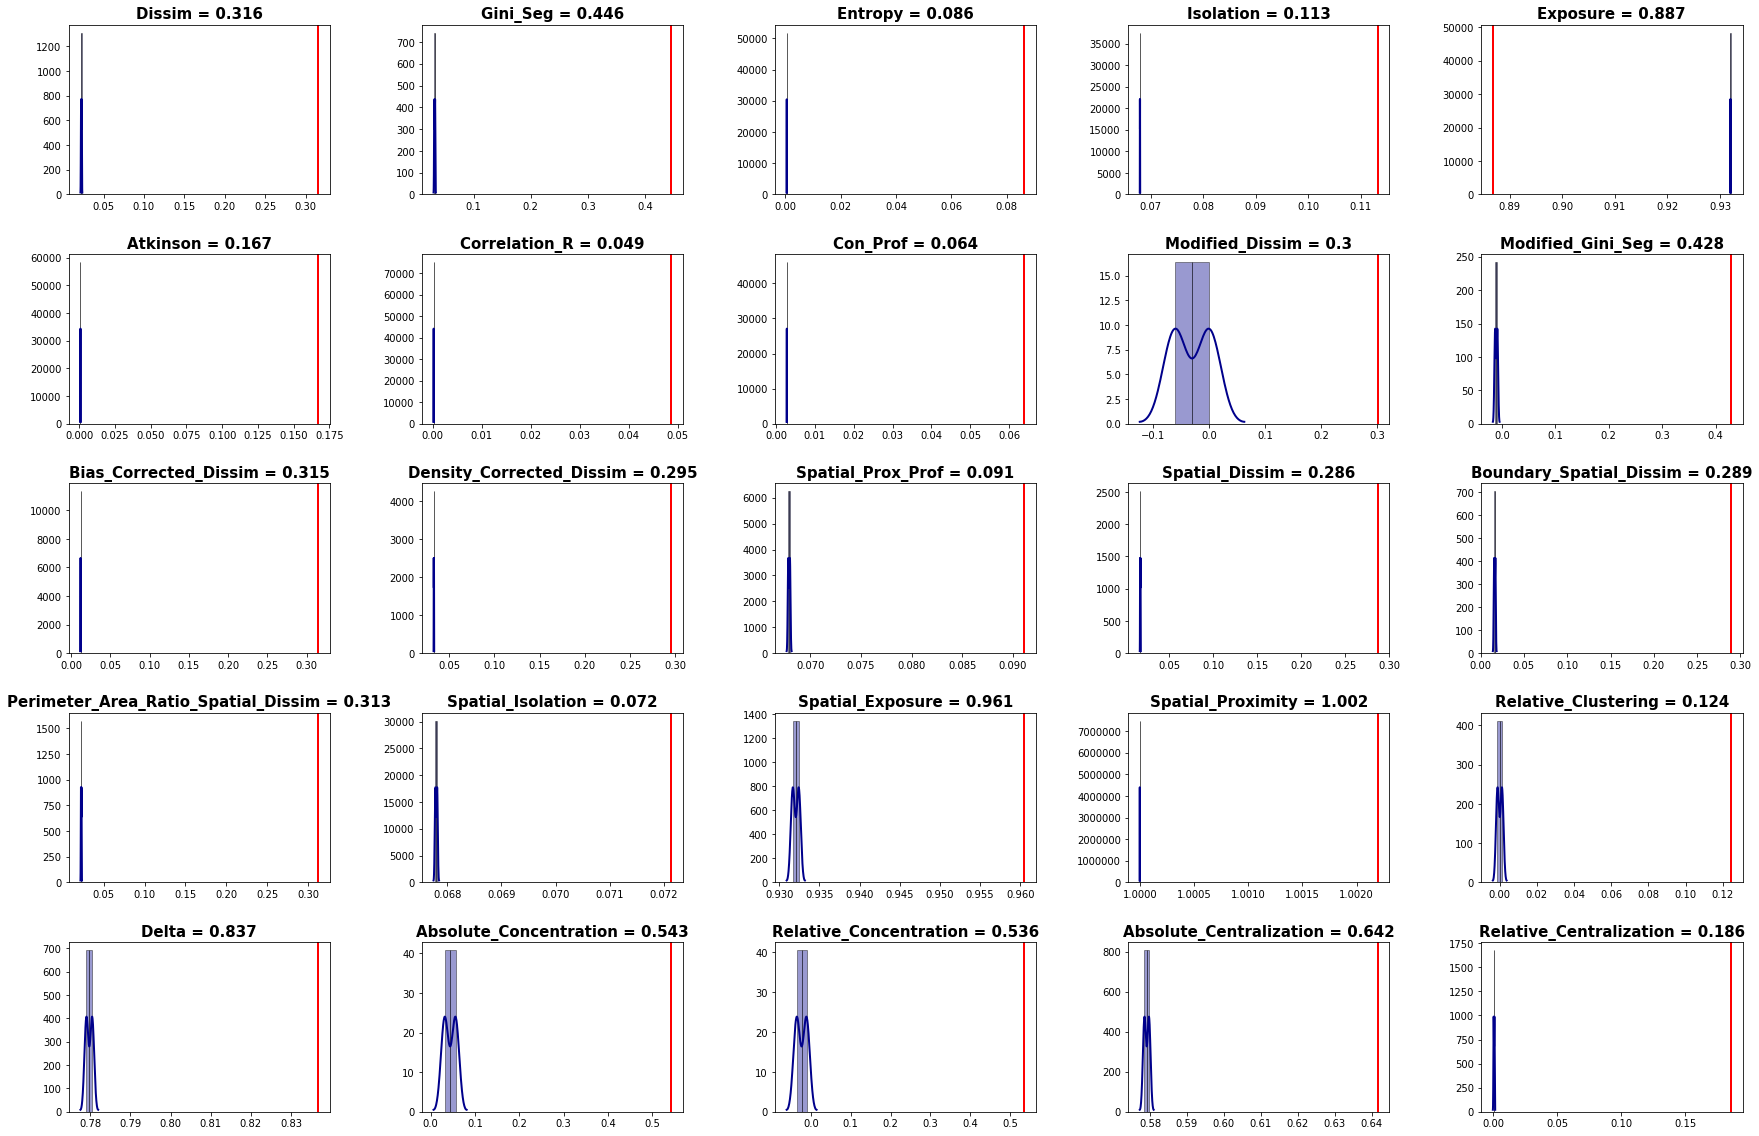

In [9]:
# Systematic Approach

# The iterator of the subplots is not zero index-based

fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

for i in range(1, len(all_measures)+1):
    t0_i = time.time()
    aux = Infer_Segregation(all_measures[i-1], iterations = 2)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.statistic, color = 'red', linewidth = 2)
    plt.title('{} = {}'.format(aux._class_name, round(aux.statistic, 3)), fontweight = "bold", fontsize = 15)
    
t1 = time.time()

total = t1 - t0

print('Total Time = {}'.format(total))

# One-Third of the simulation time is only due to the Density Corrected Dissimilarity

### Riverside in 2010: Permutation approach

In [10]:
# Permutation Approach

# For permutation approach, we need to subset the all_measures object to only spatial measures

spatial_measures = (SPP, SD, BSD, PARD, SxPx, SxPy, SP, RCL, DEL, ACO, RCO, ACE, RCE)

Spatial_Prox_Prof Time = 1.0229504108428955
Spatial_Dissim Time = 0.3274354934692383
Boundary_Spatial_Dissim Time = 1.7913298606872559
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.8290960788726807
Spatial_Isolation Time = 0.04688692092895508
Spatial_Exposure Time = 0.06248784065246582
Spatial_Proximity Time = 0.08008766174316406
Relative_Clustering Time = 0.05685019493103027
Delta Time = 0.012965202331542969
Absolute_Concentration Time = 0.024963855743408203
Relative_Concentration Time = 0.018718242645263672
Absolute_Centralization Time = 0.056205034255981445
Relative_Centralization Time = 0.04259157180786133
Total Time = 5.554933547973633


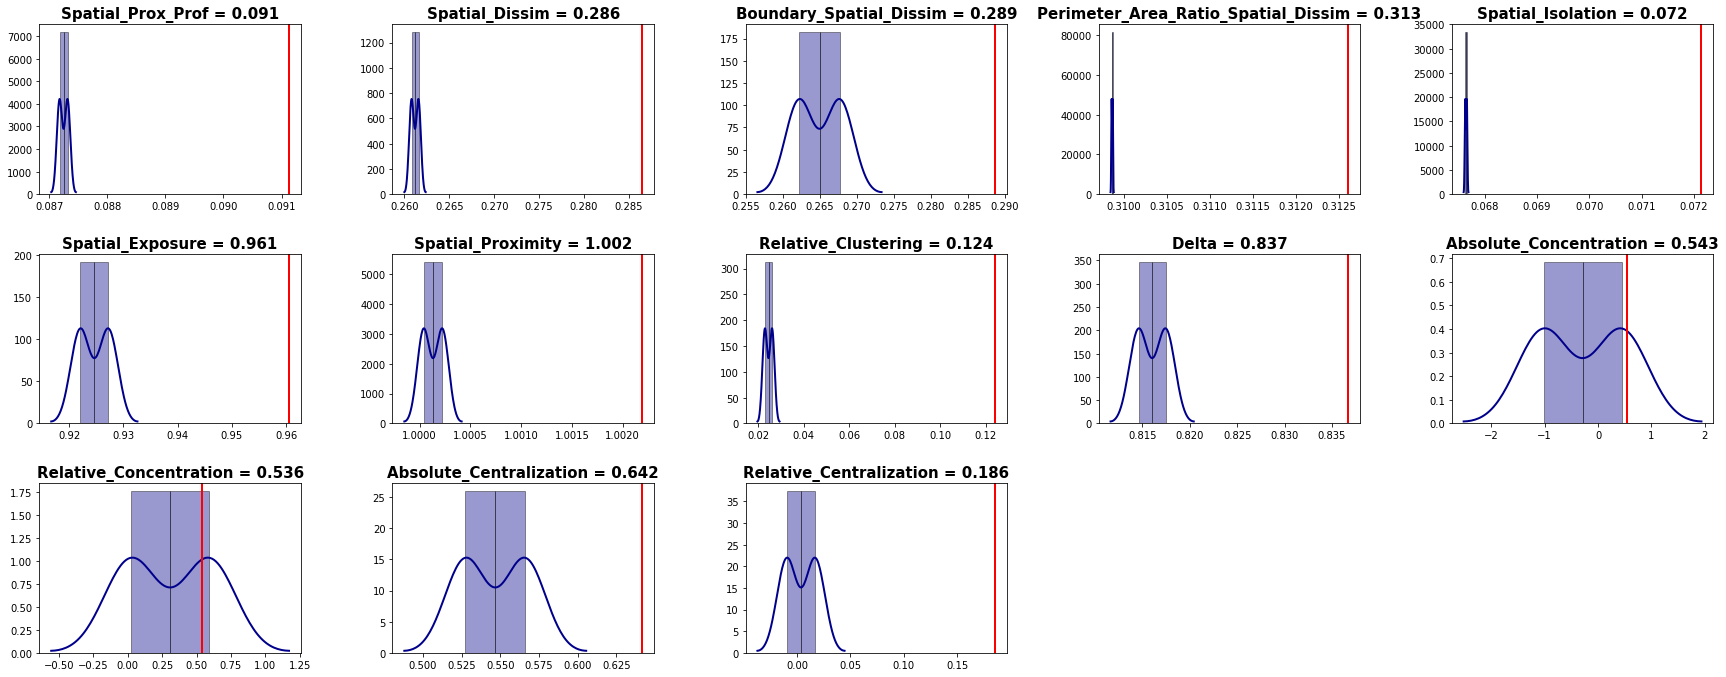

In [11]:
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

for i in range(1, len(spatial_measures)+1):
    t0_i = time.time()
    aux = Infer_Segregation(spatial_measures[i-1], null_approach = "permutation", iterations = 2)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.statistic, color = 'red', linewidth = 2)
    plt.title('{} = {}'.format(aux._class_name, round(aux.statistic, 3)), fontweight = "bold", fontsize = 15)
    
t1 = time.time()

total = t1 - t0

print('Total Time = {}'.format(total))

### Riverside against itself: Random Data approach

In [12]:
census_2000 = pd.read_csv("C:/Users/renan/Desktop/full_count_2010/LTDB_Std_2000_fullcount.csv", encoding = "ISO-8859-1", sep = ",")

# Some population data for 2000 came as decimals
census_2000['pop00']   = round(census_2000['POP00']).astype(int)
census_2000['nhblk00'] = round(census_2000['NHBLK00']).astype(int)
census_2000['trtid10'] = census_2000['TRTID10']
gdf_2000 = map_gpd.merge(census_2000, left_on = 'INTGEOID10', right_on = 'trtid10')[['geometry', 'nhblk00', 'pop00']]

In [13]:
gdf_2000['share'] = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['nhblk00'].sum())
gdf_2000['rel']   = np.where(gdf_2000['pop00'] == 0, 0, gdf_2000['nhblk00'] / gdf_2000['pop00'])

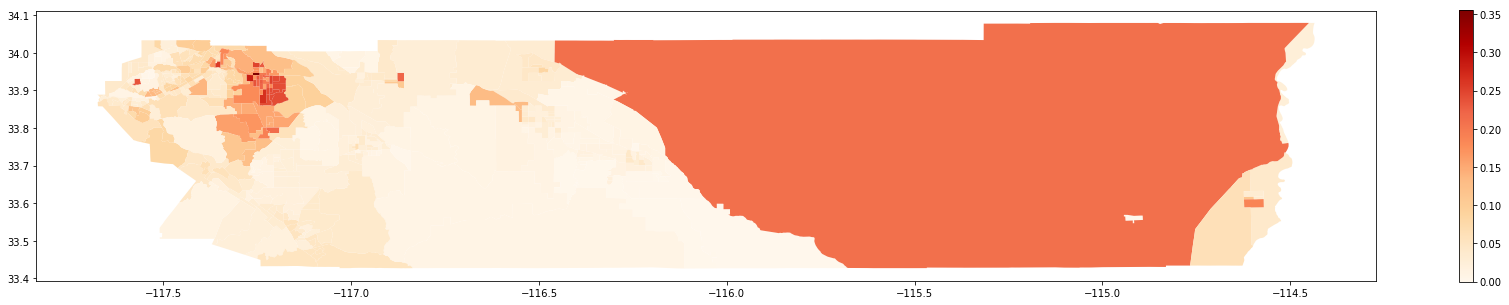

In [14]:
ax1 = gdf_2000.plot(column='rel',
                    cmap = 'OrRd', 
                    figsize=(30,5),
                    legend = True)

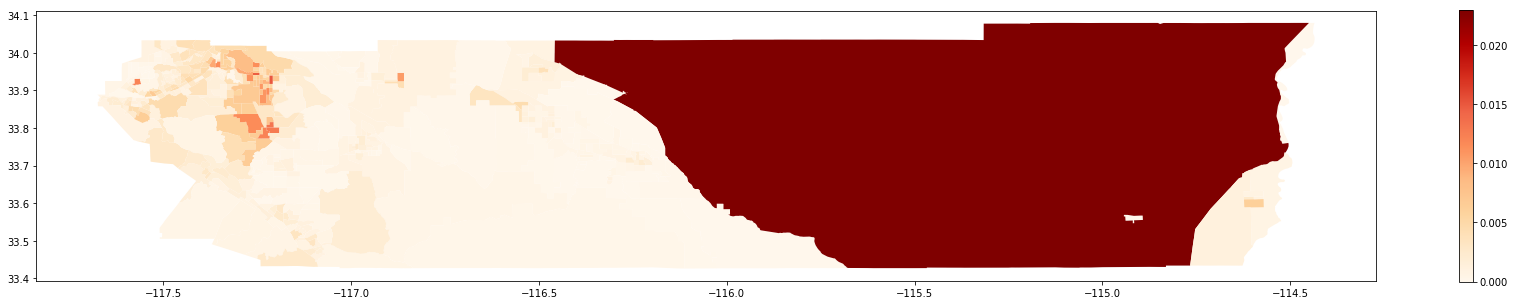

In [15]:
ax1 = gdf_2000.plot(column='share',
                    cmap = 'OrRd', 
                    figsize=(30,5),
                    legend = True)

In [16]:
# Non-Spatial measures
D_2000 = Dissim(gdf_2000, 'nhblk00', 'pop00')
G_2000 = Gini_Seg(gdf_2000, 'nhblk00', 'pop00')
H_2000 = Entropy(gdf_2000, 'nhblk00', 'pop00')
A_2000 = Atkinson(gdf_2000, 'nhblk00', 'pop00')
xPy_2000 = Exposure(gdf_2000, 'nhblk00', 'pop00')
xPx_2000 = Isolation(gdf_2000, 'nhblk00', 'pop00')
R_2000 = Con_Prof(gdf_2000, 'nhblk00', 'pop00')
Dbc_2000 = Bias_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
Ddc_2000 = Density_Corrected_Dissim(gdf_2000, 'nhblk00', 'pop00')
V_2000 = Correlation_R(gdf_2000, 'nhblk00', 'pop00')
Dct_2000 = Modified_Dissim(gdf_2000, 'nhblk00', 'pop00')
Gct_2000 = Modified_Gini_Seg(gdf_2000, 'nhblk00', 'pop00')

In [17]:
# Spatial measures
SD_2000 = Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
PARD_2000 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
BSD_2000 = Boundary_Spatial_Dissim(gdf_2000, 'nhblk00', 'pop00')
ACE_2000 = Absolute_Centralization(gdf_2000, 'nhblk00', 'pop00')
ACO_2000 = Absolute_Concentration(gdf_2000, 'nhblk00', 'pop00')
DEL_2000 = Delta(gdf_2000, 'nhblk00', 'pop00')
RCE_2000 = Relative_Centralization(gdf_2000, 'nhblk00', 'pop00')
RCL_2000 = Relative_Clustering(gdf_2000, 'nhblk00', 'pop00')
RCO_2000 = Relative_Concentration(gdf_2000, 'nhblk00', 'pop00')
SxPy_2000 = Spatial_Exposure(gdf_2000, 'nhblk00', 'pop00')
SxPx_2000 = Spatial_Isolation(gdf_2000, 'nhblk00', 'pop00')
SPP_2000 = Spatial_Prox_Prof(gdf_2000, 'nhblk00', 'pop00')
SP_2000 = Spatial_Proximity(gdf_2000, 'nhblk00', 'pop00')

In [18]:
all_measures_2000 = (D_2000, G_2000, H_2000, xPx_2000, xPy_2000, A_2000, V_2000, R_2000, Dct_2000, Gct_2000, Dbc_2000, Ddc_2000, SPP_2000, SD_2000, BSD_2000, PARD_2000, SxPx_2000, SxPy_2000, SP_2000, RCL_2000, DEL_2000, ACO_2000, RCO_2000, ACE_2000, RCE_2000)

Dissim Time = 0.05855822563171387
Gini_Seg Time = 0.07810711860656738
Entropy Time = 0.058028459548950195
Isolation Time = 0.06885528564453125
Exposure Time = 0.061655521392822266
Atkinson Time = 0.06251692771911621
Correlation_R Time = 0.07090592384338379
Con_Prof Time = 1.731489658355713
Modified_Dissim Time = 5.1097731590271
Modified_Gini_Seg Time = 9.408477306365967
Bias_Corrected_Dissim Time = 4.751063585281372
Density_Corrected_Dissim Time = 23.175971746444702
Spatial_Prox_Prof Time = 1.994189739227295
Spatial_Dissim Time = 0.6156227588653564
Boundary_Spatial_Dissim Time = 3.642944812774658
Perimeter_Area_Ratio_Spatial_Dissim Time = 3.6380631923675537
Spatial_Isolation Time = 0.16796302795410156
Spatial_Exposure Time = 0.15657901763916016
Spatial_Proximity Time = 0.1624741554260254
Relative_Clustering Time = 0.1516566276550293
Delta Time = 0.0624852180480957
Absolute_Concentration Time = 0.09378528594970703
Relative_Concentration Time = 0.09017586708068848
Absolute_Centralization

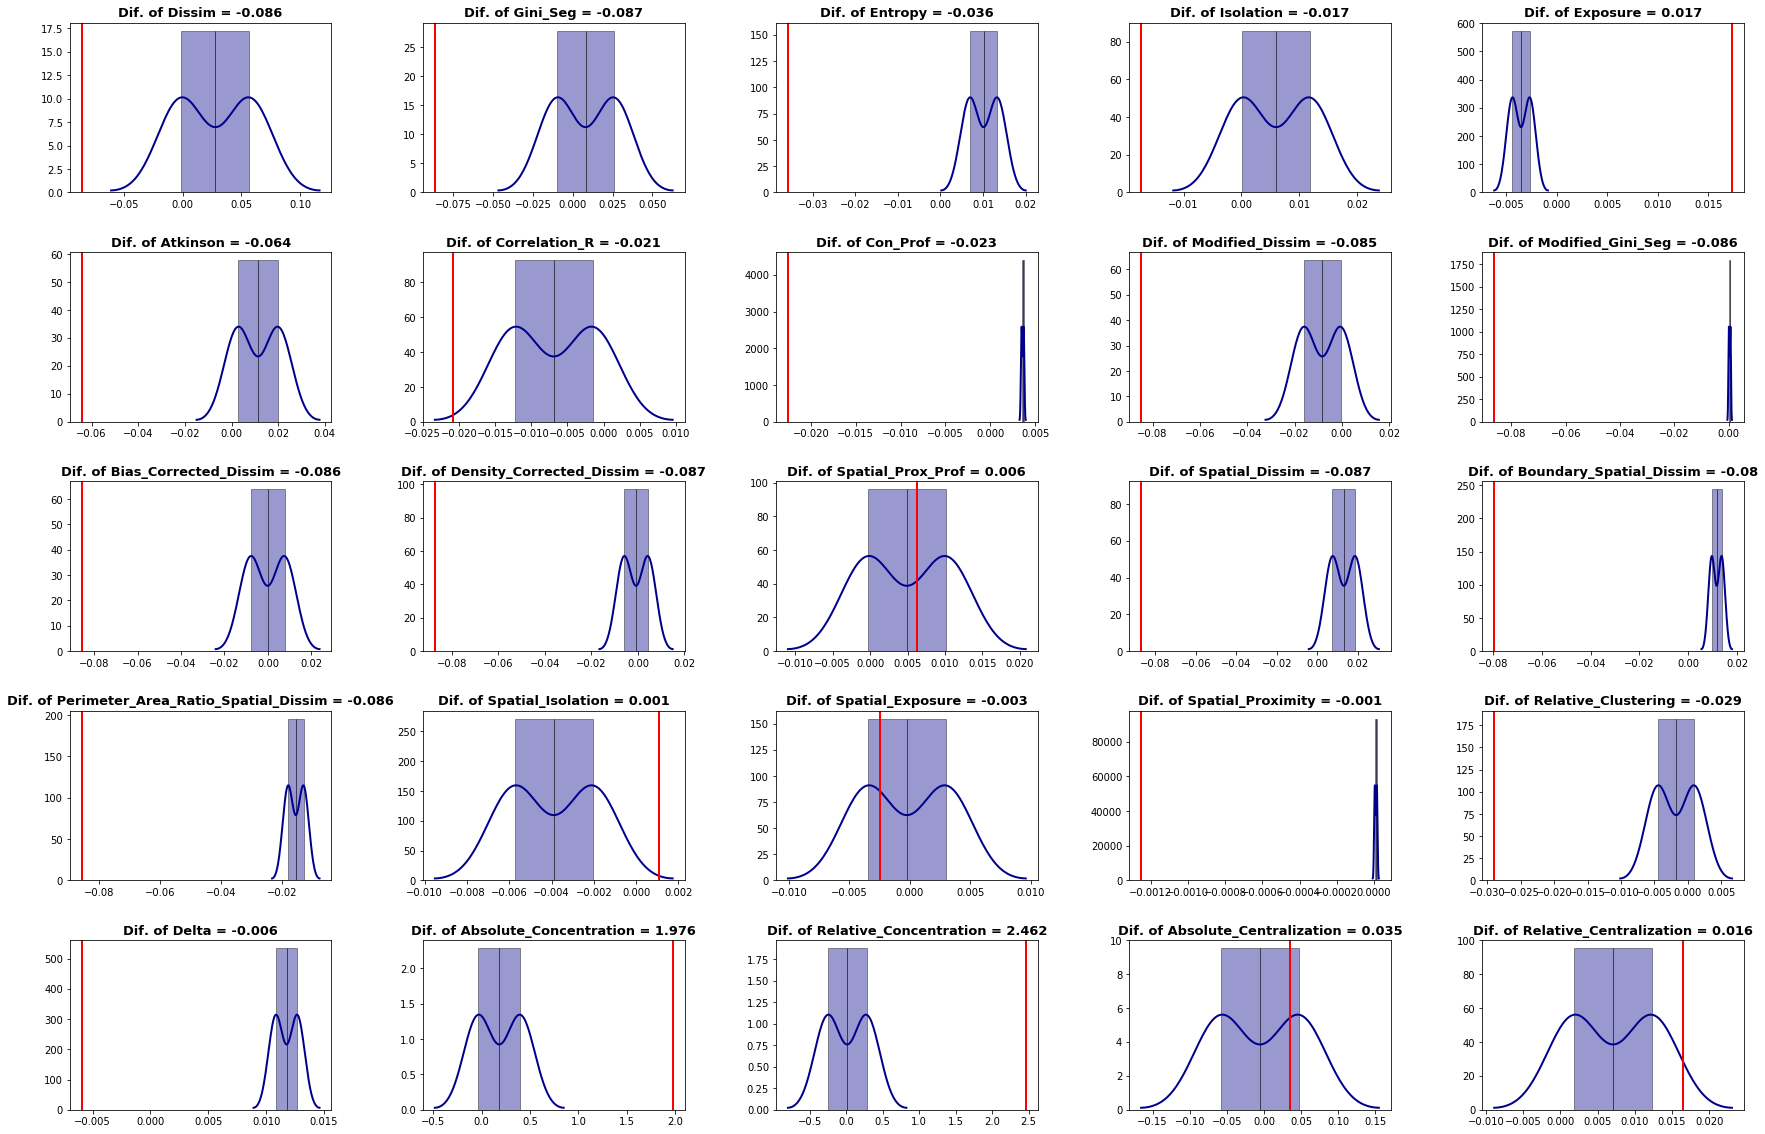

In [19]:
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

for i in range(1, len(all_measures)+1):
    t0_i = time.time()
    aux = Compare_Segregation(all_measures[i-1], all_measures_2000[i-1], iterations = 2)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
    plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)
    
t1 = time.time()

total = t1 - t0
print('Total Time = {}'.format(total))

# Half of the Time is just the Density Corrected Dissimilarity

### Riverside against San Bernardino in 2010: random data approach

In [20]:
df = census_2010.loc[census_2010.county == "San Bernardino County"][['trtid10', 'pop10','nhblk10']]

sb_map_url = 'https://raw.githubusercontent.com/renanxcortes/inequality-segregation-supplementary-files/master/Tracts_grouped_by_County/06071.json'
sb_map_gpd = gpd.read_file(sb_map_url)
sb_map_gpd['INTGEOID10'] = pd.to_numeric(sb_map_gpd["GEOID10"])
sb_gdf_pre = sb_map_gpd.merge(df, left_on = 'INTGEOID10', right_on = 'trtid10')
sb_gdf = sb_gdf_pre[['geometry', 'pop10', 'nhblk10']]

sb_gdf['share'] = np.where(sb_gdf['pop10'] == 0, 0, sb_gdf['nhblk10'] / sb_gdf['nhblk10'].sum())
sb_gdf['rel']   = np.where(sb_gdf['pop10'] == 0, 0, sb_gdf['nhblk10'] / sb_gdf['pop10'])

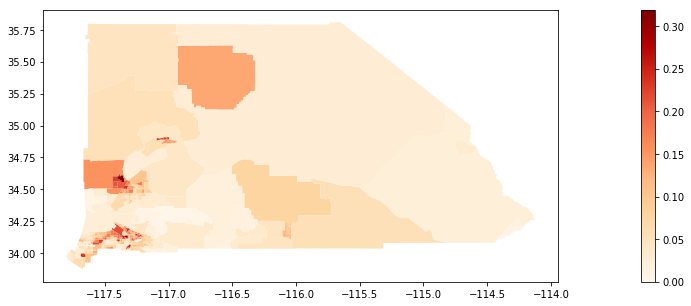

In [21]:
ax1 = sb_gdf.plot(column='rel',
                  cmap = 'OrRd', 
                  figsize=(30,5),
                  legend = True)

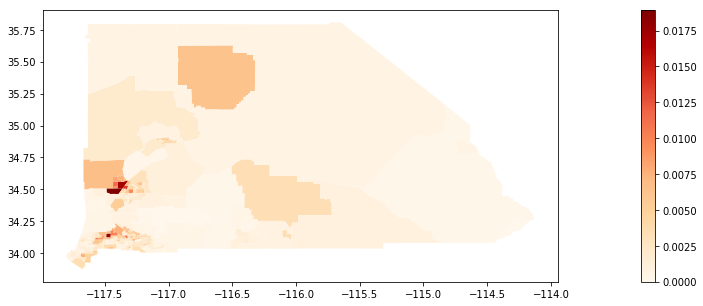

In [22]:
ax1 = sb_gdf.plot(column='share',
                  cmap = 'OrRd', 
                  figsize=(30,5),
                  legend = True)

In [23]:
# Non-Spatial measures
sb_D = Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_G = Gini_Seg(sb_gdf, 'nhblk10', 'pop10')
sb_H = Entropy(sb_gdf, 'nhblk10', 'pop10')
sb_A = Atkinson(sb_gdf, 'nhblk10', 'pop10')
sb_xPy = Exposure(sb_gdf, 'nhblk10', 'pop10')
sb_xPx = Isolation(sb_gdf, 'nhblk10', 'pop10')
sb_R = Con_Prof(sb_gdf, 'nhblk10', 'pop10')
sb_Dbc = Bias_Corrected_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_Ddc = Density_Corrected_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_V = Correlation_R(sb_gdf, 'nhblk10', 'pop10')
sb_Dct = Modified_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_Gct = Modified_Gini_Seg(sb_gdf, 'nhblk10', 'pop10')

In [24]:
# Spatial measures
sb_SD = Spatial_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_PARD = Perimeter_Area_Ratio_Spatial_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_BSD = Boundary_Spatial_Dissim(sb_gdf, 'nhblk10', 'pop10')
sb_ACE = Absolute_Centralization(sb_gdf, 'nhblk10', 'pop10')
sb_ACO = Absolute_Concentration(sb_gdf, 'nhblk10', 'pop10')
sb_DEL = Delta(sb_gdf, 'nhblk10', 'pop10')
sb_RCE = Relative_Centralization(sb_gdf, 'nhblk10', 'pop10')
sb_RCL = Relative_Clustering(sb_gdf, 'nhblk10', 'pop10')
sb_RCO = Relative_Concentration(sb_gdf, 'nhblk10', 'pop10')
sb_SxPy = Spatial_Exposure(sb_gdf, 'nhblk10', 'pop10')
sb_SxPx = Spatial_Isolation(sb_gdf, 'nhblk10', 'pop10')
sb_SPP = Spatial_Prox_Prof(sb_gdf, 'nhblk10', 'pop10')
sb_SP = Spatial_Proximity(sb_gdf, 'nhblk10', 'pop10')

In [25]:
sb_all_measures = (sb_D, sb_G, sb_H, sb_xPx, sb_xPy, sb_A, sb_V, sb_R, sb_Dct, sb_Gct, sb_Dbc, sb_Ddc, sb_SPP, sb_SD, sb_BSD, sb_PARD, sb_SxPx, sb_SxPy, sb_SP, sb_RCL, sb_DEL, sb_ACO, sb_RCO, sb_ACE, sb_RCE)

Dissim Time = 0.08577084541320801
Gini_Seg Time = 0.09021162986755371
Entropy Time = 0.06112504005432129
Isolation Time = 0.06383156776428223
Exposure Time = 0.06188511848449707
Atkinson Time = 0.050199270248413086
Correlation_R Time = 0.06262040138244629
Con_Prof Time = 1.8157033920288086
Modified_Dissim Time = 5.414273023605347
Modified_Gini_Seg Time = 8.866750955581665
Bias_Corrected_Dissim Time = 4.883957386016846
Density_Corrected_Dissim Time = 21.401115655899048
Spatial_Prox_Prof Time = 1.9526877403259277
Spatial_Dissim Time = 0.6548044681549072
Boundary_Spatial_Dissim Time = 3.7367119789123535
Perimeter_Area_Ratio_Spatial_Dissim Time = 3.752628803253174
Spatial_Isolation Time = 0.1733708381652832
Spatial_Exposure Time = 0.15791916847229004
Spatial_Proximity Time = 0.17525887489318848
Relative_Clustering Time = 0.15761351585388184
Delta Time = 0.0639650821685791
Absolute_Concentration Time = 0.09374523162841797
Relative_Concentration Time = 0.09608101844787598
Absolute_Centraliza

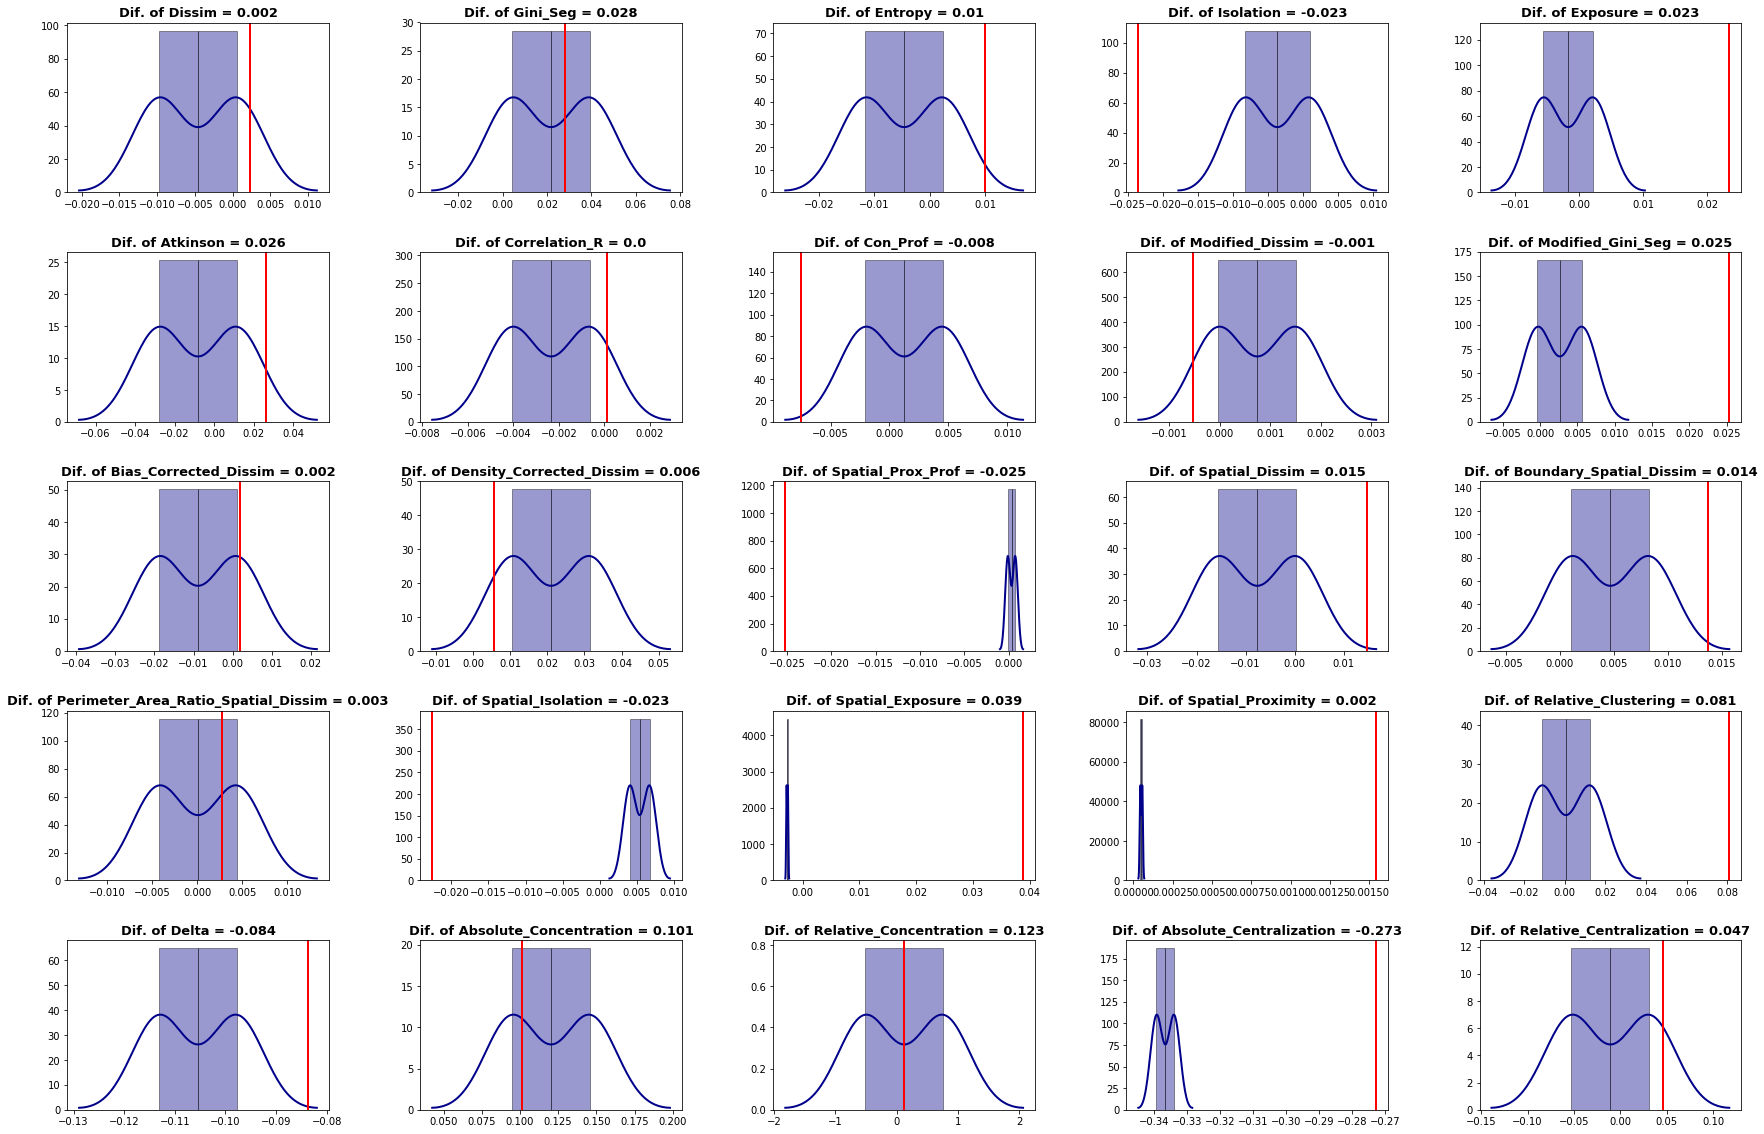

In [26]:
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

for i in range(1, len(all_measures)+1):
    t0_i = time.time()
    aux = Compare_Segregation(all_measures[i-1], sb_all_measures[i-1], iterations = 2)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
    plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)
    
t1 = time.time()

total = t1 - t0
print('Total Time = {}'.format(total))

### Riverside against San Bernardino: Random Spatial approach

Dissim Time = 0.0189816951751709
Gini_Seg Time = 0.027925729751586914
Entropy Time = 0.02194046974182129
Isolation Time = 0.017980337142944336
Exposure Time = 0.0189359188079834
Atkinson Time = 0.01692676544189453
Correlation_R Time = 0.015619516372680664
Con_Prof Time = 1.7152111530303955
Modified_Dissim Time = 5.313040494918823
Modified_Gini_Seg Time = 9.112220048904419
Bias_Corrected_Dissim Time = 4.832801818847656
Density_Corrected_Dissim Time = 21.670331716537476
Spatial_Prox_Prof Time = 1.914182424545288
Spatial_Dissim Time = 0.6328761577606201
Boundary_Spatial_Dissim Time = 2.440275192260742
Perimeter_Area_Ratio_Spatial_Dissim Time = 2.5356106758117676
Spatial_Isolation Time = 0.09691333770751953
Spatial_Exposure Time = 0.11469078063964844
Spatial_Proximity Time = 0.11565923690795898
Relative_Clustering Time = 0.10849285125732422
Delta Time = 0.031244754791259766
Absolute_Concentration Time = 0.04686474800109863
Relative_Concentration Time = 0.046865224838256836
Absolute_Central

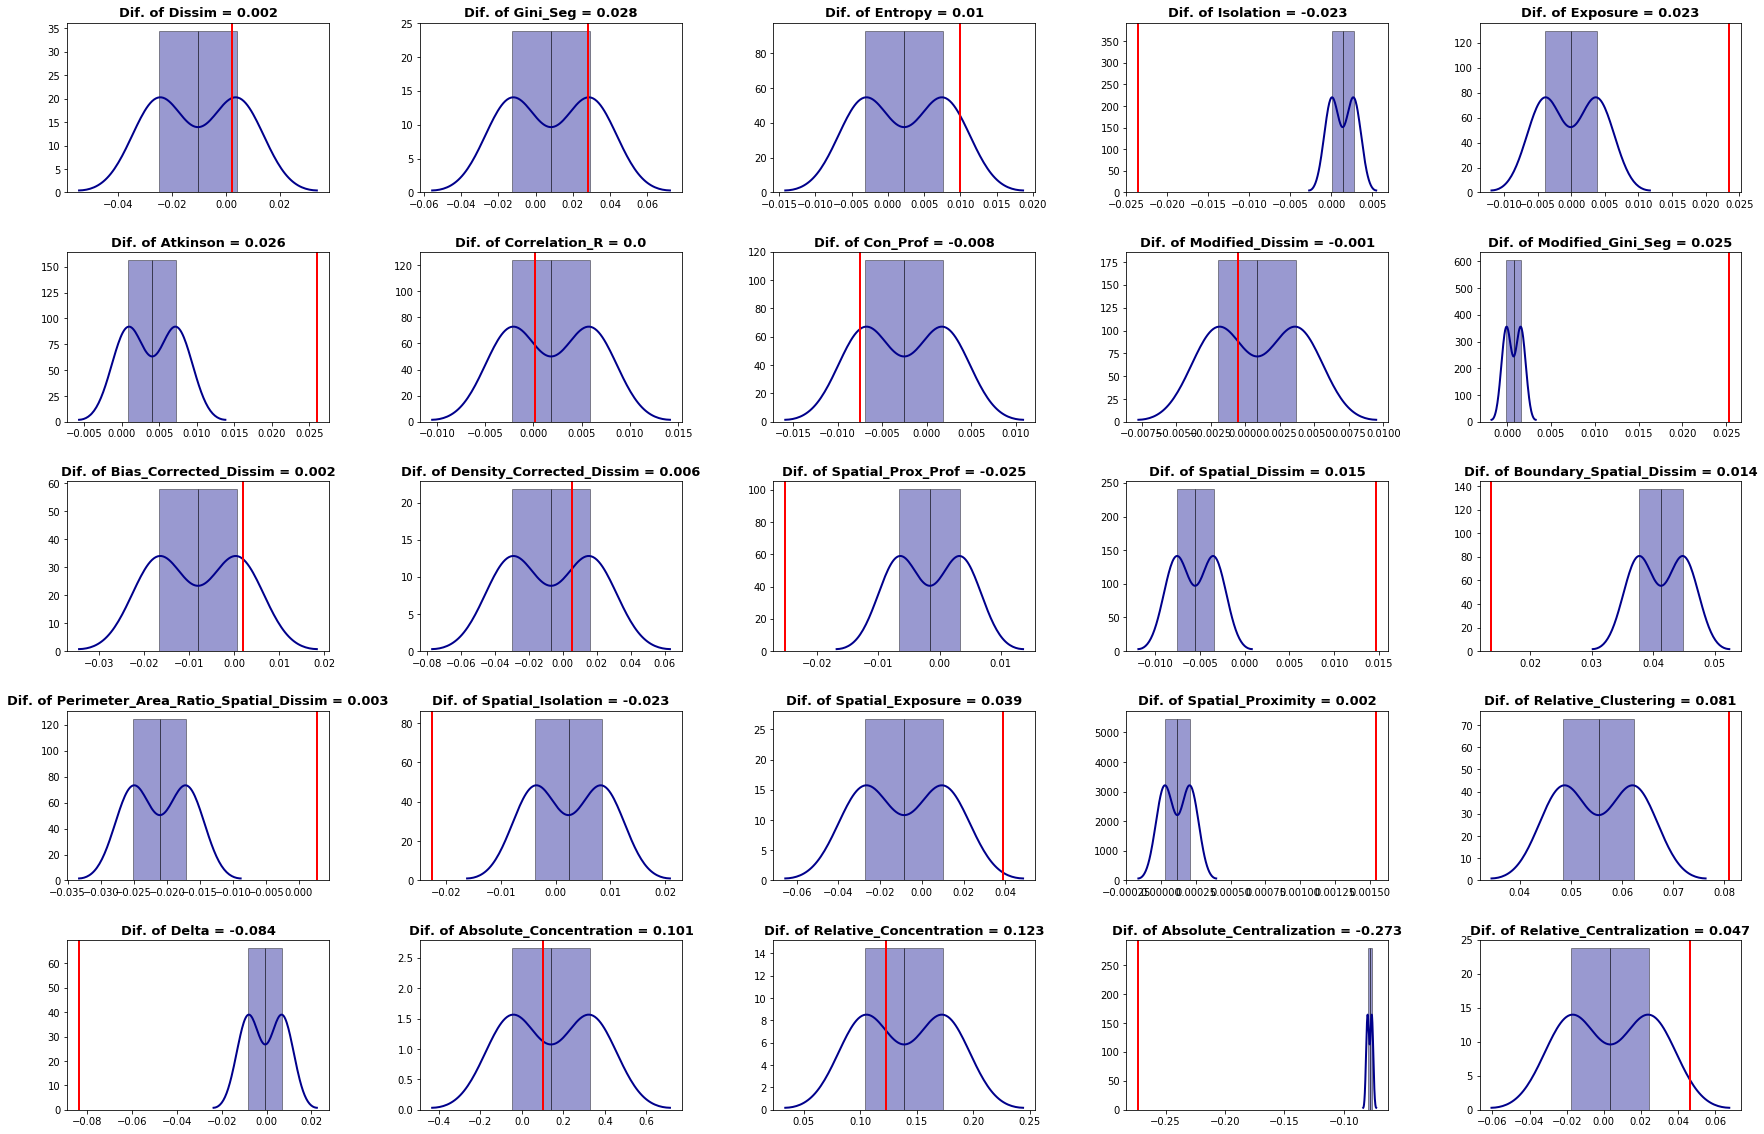

In [27]:
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

t0 = time.time()

for i in range(1, len(all_measures)+1):
    t0_i = time.time()
    aux = Compare_Segregation(all_measures[i-1], sb_all_measures[i-1], null_approach = "random_spatial", iterations = 2)
    t1_i = time.time()
    print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
    ax = fig.add_subplot(5, 5, i)
    sns.distplot(aux.est_sim, 
                 color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2})
    plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
    plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)
    
t1 = time.time()

total = t1 - t0
print('Total Time = {}'.format(total))

In [28]:
# For 2 iterations:
27.332569 + 5.5549335 + 56.044136 + 54.4559729 + 51.3984632

194.7860746

In [29]:
194.7860746/2

97.3930373

In [30]:
97.3930373*500

48696.51865

In [31]:
97.3930373*500/60

811.6086441666666

In [32]:
97.3930373*500/60/60

13.526810736111111